# What happens to the placement of prime numbers in unfounded expressions?

## No.5 三次元空間にプロットしてみる その4

先のページでは、複素平面をベクトル$(x, y)$に対して垂直に配置しましたが、今回はベクトルと平行に配置し、プロットする点を移動させます。

### 例によって共通の関数  

最初にこのセルを実行しておいて下さい

In [1]:
import numpy as np

def choice_prime_num(arr):
    """ エラトステネスのふるい """
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

def divied_colors(size, prime_num):
    colors = []
    for num in range(len(size)):
        if num in prime_num:
            colors.append('red')
        elif num % 2 == 0:
            colors.append('darkslateblue')
        else:
            colors.append('mediumseagreen')
    return colors

def make_plot_arr(arr1, arr2, t):
    grad = np.sqrt(arr1[0]**2 + arr1[1]**2)
    arr = np.array([grad  + (arr2[0] * np.cos(t)), 0, (arr2[1] * np.sin(t))])
    matrix = np.array([
        [np.cos(t), np.sin(t), 0],
        [-np.sin(t), np.cos(t), 0],
        [0, 0, 1]
    ])
    res =  matrix.dot(arr)
    return res


### 試してみる

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot3d_05(int_range, prime_num, rad):
    colors = divied_colors(int_range, prime_num)

    theta = rad* int_range
    comp =  1 - 1j ** (np.e * int_range)

    ax1_x = np.cos(theta) * int_range
    ax1_y = np.sin(theta) * int_range
    ax1 = np.stack([ax1_x, ax1_y]).T
    
    ax2_x = comp.real
    ax2_y = comp.imag
    ax2 = np.stack([ax2_x, ax2_y]).T
    
    res = []
    for a1, a2, t in zip(ax1, ax2, theta):
        res.append(make_plot_arr(a1, a2, t))
    
    arr = np.array(res).T
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_facecolor('Gainsboro')
    ax.scatter(arr[0], arr[1], arr[2], s=3, c=colors)
    #ax.scatter(arr[0], arr[1], arr[2], s=3, c="red")

    #plt.show()



<IPython.core.display.Javascript object>


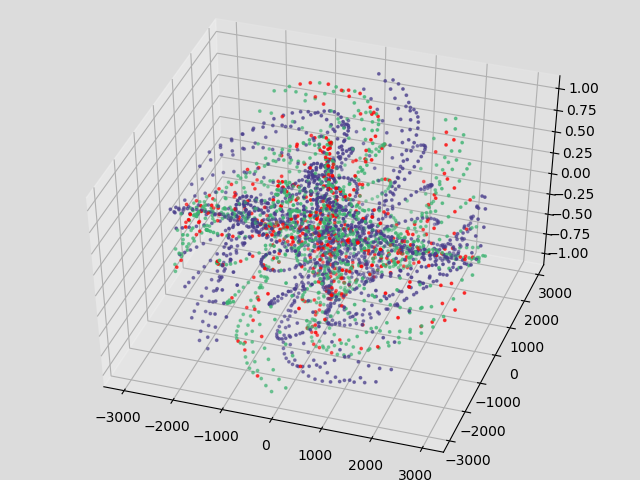

In [7]:
INT_RANGE = np.arange(1, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))


# Try switching "rad".
#rad = np.exp(-np.pi)
#rad = np.e
#rad = (np.e / 2) * np.pi
#rad = (2 * np.pi**np.e) / (np.e**(-2 * np.pi))
#rad = (np.pi**np.e) / (np.e**(-np.pi))
#rad = (2 * np.pi) / np.e**2
# rad = np.e / (2 * np.pi)
rad = np.e**(np.pi) / (np.pi**np.e)
#rad = np.e**(2 * np.pi) / (2 * np.pi**np.e)
#rad = 2 / (np.e*np.pi)
#rad = np.pi**np.e
# rad = 2**np.e*np.pi
#rad = (2*np.e)**np.pi

## おまけ
#rad = np.pi / 2


plot3d_05(INT_RANGE, PRIME_NUM, rad)